In [1]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### 1.LR多分类公式

$$
\begin{array}{c}{P(Y=k | x)=\frac{\exp \left(w_{k} \cdot x\right)}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}, \quad k=1,2, \cdots, K-1} \\ {P(Y=K | x)=\frac{1}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}}\end{array}
$$

In [2]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0,1,-1]])
    # print(data)
    return data[:,:2], data[:,-1]

In [4]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3 )

In [61]:
class LR_Classifer:
    def __init__(self, max_iter = 200, learning_rate = 0.01):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    def sigmoid(self, x):
        return 1/(1 + exp(-x))
    
    def dat_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])#追加数据到指定的列表当中
            
        return data_mat
    
    def fit(self, X, y):
        data_mat = []
        data_mat = self.dat_matrix(X)
        #print(data_mat)
        #print(len(data_mat[0]))
        self.weights =np.zeros((len(data_mat[0]), 1), dtype=np.float32)
        #print(self.weights)
        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))

                error = y[i] -result

                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])
        print("Result: ", result) 
        print("LR_model(learning rate = {}, max_iter = {})".format(self.learning_rate, self.max_iter))
        
    def score(self, X_test, y_test):
        
        right = 0
        X_test = self.dat_matrix(X_test)
        print(len(X_test))
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            #print(result)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1 
        
        return right/len(X_test)

In [72]:
lr_clf = LR_Classifer()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)
lr_clf.weights

Result:  0.9894921837831687
LR_model(learning rate = 0.01, max_iter = 200)
30


array([[-0.90014833],
       [ 3.4473245 ],
       [-5.692265  ]], dtype=float32)

[2.26432706 2.86994266 3.47555826 4.08117386]


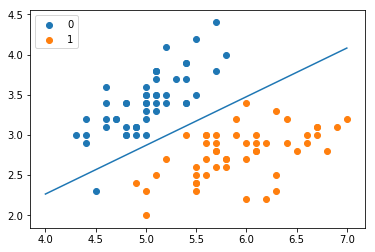

In [75]:
x_points = np.arange(4, 8)
y_ =-(lr_clf.weights[1] * x_points + lr_clf.weights[0])/lr_clf.weights[2]
print(y_)
plt.plot(x_points, y_)

plt.scatter(X[:50, 0],X[:50, 1], label = "0")
plt.scatter(X[50:, 0],X[50:, 1], label = "1")
plt.legend()

In [77]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 200)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
clf.score(X_test, y_test)
LogisticRegression??

In [80]:
print(clf.coef_, clf.intercept_)

[[ 1.94844412 -3.25414116]] [-0.48711074]


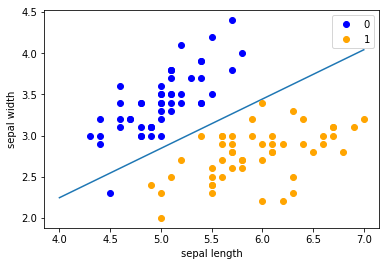

In [81]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()